In [1]:
import numpy as np
import matplotlib.pyplot as plt

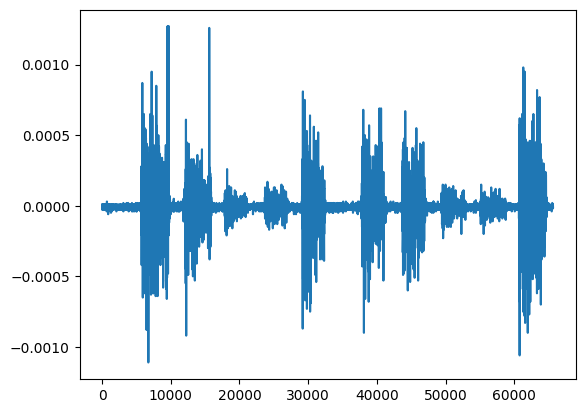

In [2]:
#sacar datos de prueba
import os #Hacer codigo para leerlos todos
ruta=os.getcwd()
archivo_prueba=os.listdir(ruta+'/EMG_data_for_gestures-master/01')
#archivo_prueba[0]
data=np.loadtxt(ruta+'/EMG_data_for_gestures-master/01/'+archivo_prueba[0],skiprows=1,delimiter='\t')
t=data[:,0]
channel_1=data[:,1]
plt.plot(t,channel_1)

1. Crear una función que reciba la señal de EMG y permita aplicar el operador Teager-Kaiser Energy Operator (TKEO).

In [3]:
def tkeo(data): 
    x=data*1
    x[1:-1]=np.square(x[1:-1])-np.multiply(x [0:-2],x[2:]) #aplica la función para todos los datos menos el primero y el último, que no es un problema (describir en análisis)
    return x

(1.0, 65661.0, -1.5053e-06, 2.1328e-06)

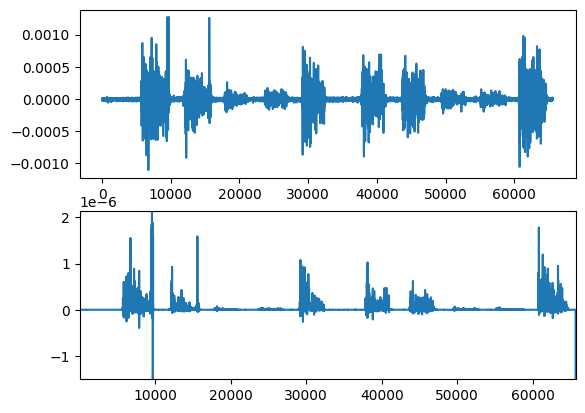

In [14]:
tkeo_channel_1=tkeo(channel_1)
plt.subplot(211)
plt.plot(t,channel_1)
plt.subplot(212)
plt.plot(t,tkeo_channel_1)
plt.axis([t[0],t[-1],np.min(tkeo_channel_1[1:-1]),np.max(tkeo_channel_1[1:-1])])

2. Crear una función que reciba una señal EMG de múltiples canales y calcule el operador TKEO para cada canal.

In [26]:
def tkeoall(xdata):
    tkeoforchannel=[]
    for i in range(1,np.shape(xdata)[1]-1):
        xx=data[:,i]
        xtkeo=tkeo(xx)
        tkeoforchannel.append(xtkeo)
    tkeoforchannel1=np.array(tkeoforchannel)
    return tkeoforchannel

    

3. Crear una función que reciba una señal EMG de múltiples canales que extraiga las siguientes características para cada canal (10 %):
   -  RMS
   -  Varianza
   -  Mean Absolute Value
   -  Mean Absolute Value Slope
   -  Slope Sign Changes
   -  Wave form length
   -  Zero Crossing

In [33]:
def rms(x): #x es un array
    x_squared=np.square(x)
    x_mean=np.mean(x_squared)
    xrms=np.sqrt(x_mean)
    return xrms

In [39]:
#funcion
def caracteristicas(xdata):
    carac_canales=[]
    for i in range(1,np.shape(xdata)[1]-1):
        xx=data[:,i]
        xrms=rms(xx) #root mean square
        xvar=np.var(xx) #varianza
        xmav=np.mean(np.abs(data)) #mean absolute value
        xmavs=np.mean(np.abs(np.diff(data))) #mean absolute value slope
        derivative = np.diff(data)
        xssc = np.sum(np.diff(np.sign(derivative)) != 0) #Slope sign changes
        diff_abs = np.abs(np.diff(data))
        xwl = np.sum(diff_abs) #waveform length
        xzc = len(np.where(np.diff(np.sign(data)))[0]) #zero crossings
        carac_canal_actual=[xrms,xvar,xmav,xmavs,xssc,xwl,xzc]
        carac_canales.append(carac_canal_actual)
    return np.array(carac_canales)


4. Crear una rutina que aplique sobre todo los archivos de la base de datos las funciones descritas en 2 y 3 (5 %)